In [ ]:
###macro to compare the analyical and AI pipeline on experimental data

In [10]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import functions
import root_function

In [11]:
view='xz'

In [12]:
# Apri il file ROOT in modalità di lettura
if view=='xz':
    file = ROOT.TFile("/lustrehome/federicacuna/TB_Sept_2023_ml/root_file_predhit/pred_EXPdata_xz_sage_conv.root", "READ")
    tree = file.Get("Reco_tree")
    
    # Definisci la variabile per contenere il vettore
    ly_ev_vec = ROOT.std.vector("float")()
    x_ev_vec = ROOT.std.vector("float")()
    z_ev_vec = ROOT.std.vector("float")()
    dx_ev_vec = ROOT.std.vector("float")()
    pe_ev_vec = ROOT.std.vector("float")()
    no_good_ev_vec= ROOT.std.vector("int")()
    # Ottieni il branch ly_ev_vec
    tree.SetBranchAddress("ly_ev_vec", ROOT.AddressOf(ly_ev_vec))
    tree.SetBranchAddress("x_ev_vec", ROOT.AddressOf(x_ev_vec))
    tree.SetBranchAddress("z_ev_vec", ROOT.AddressOf(z_ev_vec))
    tree.SetBranchAddress("dx_ev_vec", ROOT.AddressOf(dx_ev_vec))
    tree.SetBranchAddress("pe_ev_vec", ROOT.AddressOf(pe_ev_vec))
    tree.SetBranchAddress("no_good_ev_vec", ROOT.AddressOf(no_good_ev_vec))
    
    
    # Leggi l'intero albero e ottieni il numero di eventi
    n_events = tree.GetEntries()
    n_events=1000
    print(n_events)
    
    # Itera su tutti gli eventi e stampa il vettore per ciascuno
    ly_hit=[]
    x_hit=[]
    z_hit=[]
    dx_hit=[]
    pe_hit=[]
    no_good_events=[]
    for i in range(0,n_events):
        tree.GetEntry(i)  # Leggi l'evento corrente  
        # if i%1000==0:
        #     print('processing ev ',i)
        # Stampa i valori nella lista
        no_good_events.append(list(no_good_ev_vec))
        if i not in list(no_good_ev_vec):   
            ly_hit.append([])
            x_hit.append([])
            z_hit.append([])
            dx_hit.append([])
            pe_hit.append([])            
            for ly,x,z,dx,pe in zip(ly_ev_vec,x_ev_vec,z_ev_vec,dx_ev_vec,pe_ev_vec):
                ly_hit[-1].append(ly)
                x_hit[-1].append(x)
                z_hit[-1].append(z)
                dx_hit[-1].append(dx)
                pe_hit[-1].append(pe)

            # else:
            #     print( 'GNN did not find good hits in this event: ',i)
                # print('ev ',i,' ly  ',ly,' x ',x, ' z ',z,' dx ',dx)     
    # Chiudi il file ROOT
    
    file.Close()
else:

    file = ROOT.TFile("/lustrehome/federicacuna/TB_Sept_2023_ml/root_file_predhit/pred_EXPdata_yz_sageconv.root", "READ")
        
    # Ottieni l'albero Reco_tree
    # Ottieni l'albero Reco_tree
    tree = file.Get("Reco_tree")
    
    # Definisci la variabile per contenere il vettore
    ly_ev_vec = ROOT.std.vector("float")()
    y_ev_vec = ROOT.std.vector("float")()
    z_ev_vec = ROOT.std.vector("float")()
    dy_ev_vec = ROOT.std.vector("float")()
    pe_ev_vec = ROOT.std.vector("float")()
    no_good_ev_vec= ROOT.std.vector("int")()
    
    # Ottieni il branch ly_ev_vec
    tree.SetBranchAddress("ly_ev_vec", ROOT.AddressOf(ly_ev_vec))
    tree.SetBranchAddress("y_ev_vec", ROOT.AddressOf(y_ev_vec))
    tree.SetBranchAddress("z_ev_vec", ROOT.AddressOf(z_ev_vec))
    tree.SetBranchAddress("dy_ev_vec", ROOT.AddressOf(dy_ev_vec))
    tree.SetBranchAddress("pe_ev_vec", ROOT.AddressOf(pe_ev_vec))
    tree.SetBranchAddress("no_good_ev_vec", ROOT.AddressOf(no_good_ev_vec))

    
    # Leggi l'intero albero e ottieni il numero di eventi
    n_events = tree.GetEntries()
    print(n_events)
    n_events=1000
    
    # Itera su tutti gli eventi e stampa il vettore per ciascuno
    ly_hit=[]
    y_hit=[]
    z_hit=[]
    dy_hit=[]
    pe_hit=[]
    no_good_events=[]
    for i in range(0,n_events):
        tree.GetEntry(i)  # Leggi l'evento corrente  
        # Stampa i valori nella lista
        no_good_events.append(list(no_good_ev_vec))
        if i not in list(no_good_ev_vec):   
            ly_hit.append([])
            y_hit.append([])
            z_hit.append([])
            dy_hit.append([])
            pe_hit.append([])            
            for ly,y,z,dy,pe in zip(ly_ev_vec,y_ev_vec,z_ev_vec,dy_ev_vec,pe_ev_vec):
                ly_hit[-1].append(ly)
                y_hit[-1].append(y)
                z_hit[-1].append(z)
                dy_hit[-1].append(dy)
                pe_hit[-1].append(pe)
        # else:
        #     print( 'GNN did not find good hits in this event: ',i)
              
    # Chiudi il file ROOT
    file.Close()
    

1000


In [16]:
####reading the root file from traditional track finding/fitting pipeline (Loparco)
file_trad = ROOT.TFile("/lustrehome/federicacuna/TestBeam_T10_2023/outresults_root/Analysis_v1.3_20230910_055858_Aligned.root", "READ")
tree = file_trad.Get("tree")
n_ev=tree.GetEntries()
ax_ev_trad=[]
bx_ev_trad=[]
ay_ev_trad=[]
by_ev_trad=[]
x_orig=[]
y_orig=[]
zx_orig=[]
zy_orig=[]
dx_orig=[]
cz_trad=[]
cx_trad=[]
cy_trad=[]
chi_x_trad=[]
chi_y_trad=[]
dy_orig=[]
n_ev=1000
for i in range(n_ev):
    tree.GetEntry(i)
    if i not in (no_good_ev_vec): 
        x_orig.append([])
        y_orig.append([])
        zx_orig.append([])
        zy_orig.append([])
        dy_orig.append([])
        dx_orig.append([])

        ievent=tree.ievent
        nclux=tree.nclux
        ncluy=tree.ncluy
        chi_x_trad.append(tree.chi2x)
        chi_y_trad.append(tree.chi2y)
        cz_trad.append(tree.cz)
        cx_trad.append(tree.cx)
        cy_trad.append(tree.cy)
        ax_ev_trad.append(tree.ax)
        bx_ev_trad.append(tree.bx)
        ay_ev_trad.append(tree.ay)
        by_ev_trad.append(tree.by)

        for j in range(nclux):
            x_orig[-1].append(tree.xclux[j])        
            zx_orig[-1].append(tree.zclux[j])
            dx_orig[-1].append(tree.dxclux[j])
              
        for k in range(ncluy):
            y_orig[-1].append(tree.ycluy[k])        
            zy_orig[-1].append(tree.zcluy[k])
            dy_orig[-1].append(tree.dycluy[k])

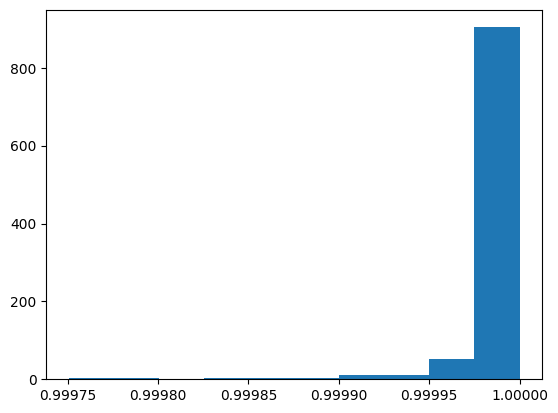

In [18]:
plt.hist(cz_trad)
plt.show()

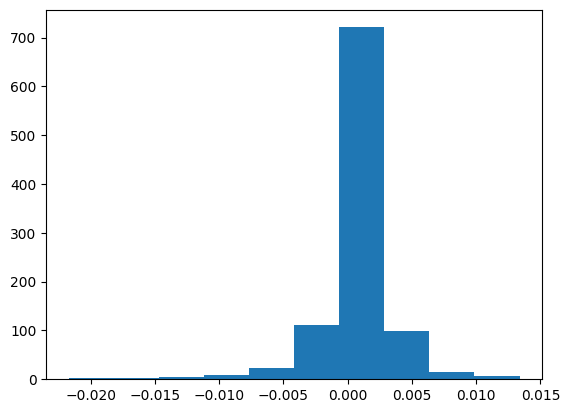

In [19]:
plt.hist(cx_trad)
plt.show()

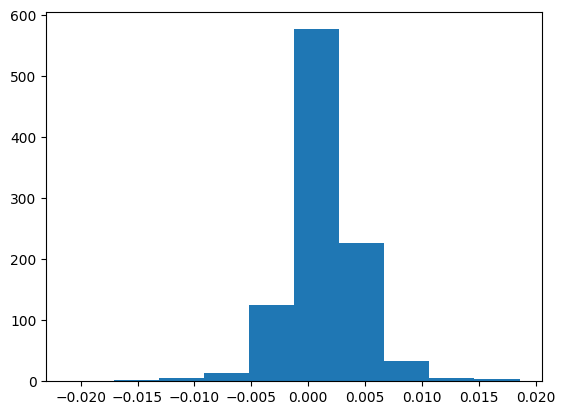

In [20]:
plt.hist(cy_trad)
plt.show()

In [33]:
# f1=ROOT.TF1("f1","[0]*([1]*x+[2])")
# f2=ROOT.TF1("f2","pol1")
# # f1.SetParameters(-50,-50,7000)
# # f1.SetParLimits(0,-3000,3000)
# # f1.SetParLimits(1,-100,100)
# # f1.SetParLimits(2,-1000,3000)
# if view=='xz':
#     gr=[]
#     c1=[]
#     for i in range(0,2):
#         c1.append(ROOT.TCanvas(f"c1{i}",f"c1{i}"))
#         gr.append(ROOT.TGraph(len(np.array(x_hit[i])),np.array(x_hit[i]),np.array(z_hit[i])))
    
#     hchi_root=ROOT.TH1F("hchi_root","hchi_root",100,0,1000000)
#     for i in range(0,1000):
#         c1[i].cd()
#         gr[i].GetXaxis().SetLimits(-20.0,20.0);
#         gr[i].Draw("AP")
#         tmpxmin=ROOT.TMath.MinElement(gr[i].GetN(),gr[i].GetX())
#         tmpxmax=ROOT.TMath.MaxElement(gr[i].GetN(),gr[i].GetX())
#         gr[i].SetTitle(f"x-z view for ev {i}")
#         gr[i].SetMarkerStyle(8)
#         gr[i].Fit('f2',"","",tmpxmin-1,tmpxmax+1)
#         gr[i].Fit('f2',"","",tmpxmin-1,tmpxmax+1)
#         gr[i].Fit('f2',"","",tmpxmin-1,tmpxmax+1)
#         # print('chi2 ',f2.GetChisquare())
#         # print('ndf ',f2.GetNDF())
#         # print(f2.GetChisquare()/f2.GetNDF())
#         hchi_root.Fill(f2.GetChisquare())
#         # c1[i].Draw()
#     cchi_root=ROOT.TCanvas("cchi_root","cchi_root")
#     cchi_root.cd()
#     hchi_root.Draw()    
#     cchi_root.Draw()
# else:
#     gr=[]
#     c1=[]
#     for i in range(0,2):
#         c1.append(ROOT.TCanvas(f"c1{i}",f"c1{i}"))
#         gr.append(ROOT.TGraph(len(np.array(y_hit[i])),np.array(y_hit[i]),np.array(z_hit[i])))
    
#     hchi_root=ROOT.TH1F("hchi_root","hchi_root",100,0,1000000)
#     for i in range(0,2):
#         c1[i].cd()
#         gr[i].GetXaxis().SetLimits(-20.0,20.0);
#         gr[i].Draw("AP")
#         tmpxmin=ROOT.TMath.MinElement(gr[i].GetN(),gr[i].GetX())
#         tmpxmax=ROOT.TMath.MaxElement(gr[i].GetN(),gr[i].GetX())
#         gr[i].SetTitle(f"y-z view for ev {i}")
#         gr[i].SetMarkerStyle(8)
#         gr[i].Fit('f2',"","",tmpxmin-1,tmpxmax+1)
#         gr[i].Fit('f2',"","",tmpxmin-1,tmpxmax+1)
#         gr[i].Fit('f2',"","",tmpxmin-1,tmpxmax+1)
#         # print('chi2 ',f2.GetChisquare())
#         # print('ndf ',f2.GetNDF())
#         # print(f2.GetChisquare()/f2.GetNDF())
#         hchi_root.Fill(f2.GetChisquare())
#         # c1[i].Draw()
#     cchi_root=ROOT.TCanvas("cchi_root","cchi_root")
#     cchi_root.cd()
#     hchi_root.Draw()    
#     cchi_root.Draw()

In [31]:
# if view=='xz':
#     z_hit_cleaned = []
#     x_hit_cleaned = []
#     dx_hit_cleaned = []

#     for i in range(0, n_events):
#         idx_to_remove = [idx for idx, value in enumerate(z_hit[i]) if value == 1206.0]

#         z_hit_cleaned.append([value for idx, value in enumerate(z_hit[i]) if idx not in idx_to_remove])
#         x_hit_cleaned.append([value for idx, value in enumerate(x_hit[i]) if idx not in idx_to_remove])
#         dx_hit_cleaned.append([value for idx, value in enumerate(dx_hit[i]) if idx not in idx_to_remove])
# else:
#     z_hit_cleaned = []
#     y_hit_cleaned = []
#     dy_hit_cleaned = []

#     for i in range(0, n_events):
#         idx_to_remove = [idx for idx, value in enumerate(z_hit[i]) if value == 1210.0]

#         z_hit_cleaned.append([value for idx, value in enumerate(z_hit[i]) if idx not in idx_to_remove])
#         y_hit_cleaned.append([value for idx, value in enumerate(y_hit[i]) if idx not in idx_to_remove])
#         dy_hit_cleaned.append([value for idx, value in enumerate(dy_hit[i]) if idx not in idx_to_remove])


In [5]:
ax_ev=[]
bx_ev=[]
ay_ev=[]
by_ev=[]

if view=='xz':
    ax_ev,bx_ev=functions.linear_fit(len(ly_hit),x_hit,z_hit,dx_hit)
else:
    ay_ev,by_ev=functions.linear_fit(len(ly_hit),y_hit,z_hit,dy_hit)
   

/tmp/ipykernel_26138/2311151544.py:27: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(zx_orig[i], x_orig[i], xerr=0,yerr=dx_orig[i],marker='o',fmt='o',ecolor='black',color='grey',label='data point')


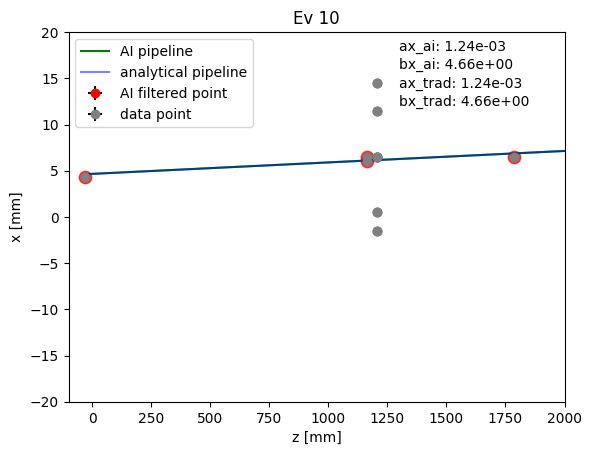

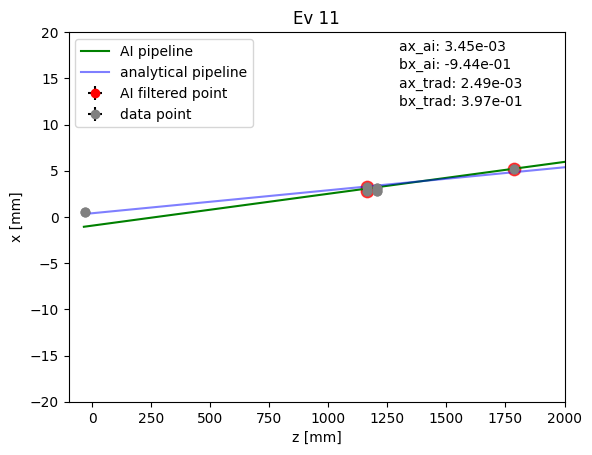

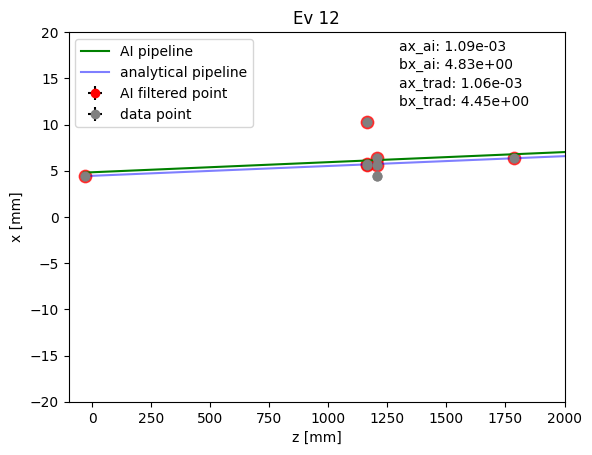

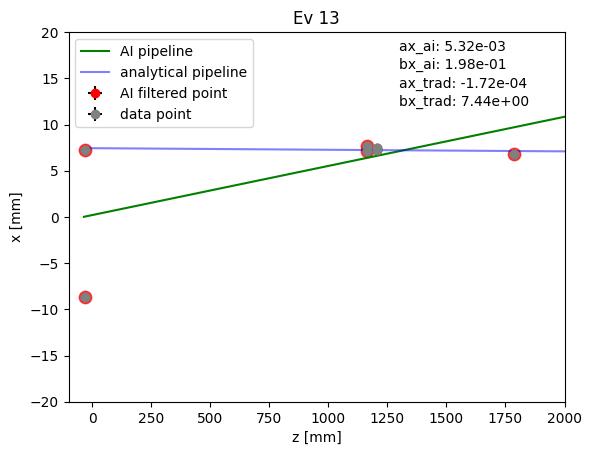

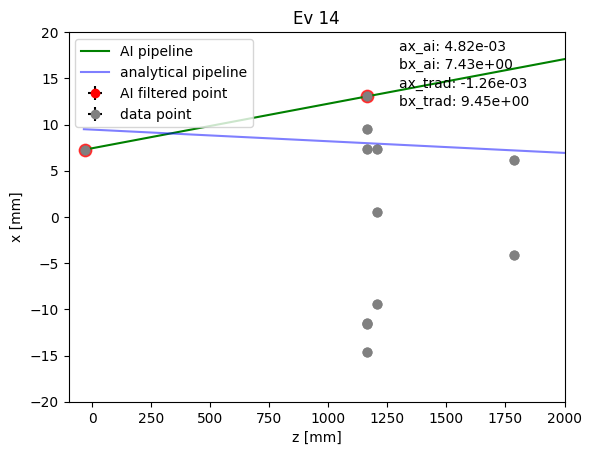

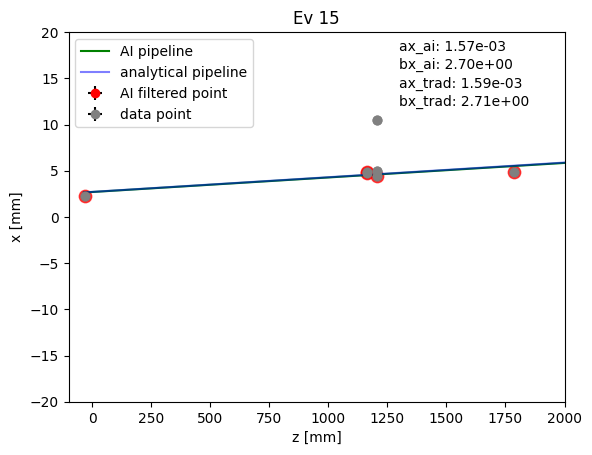

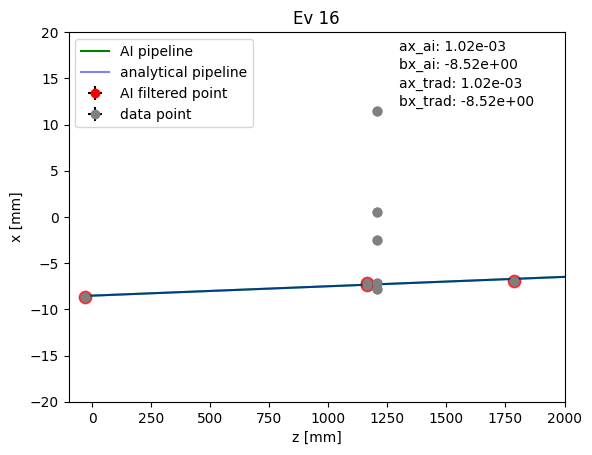

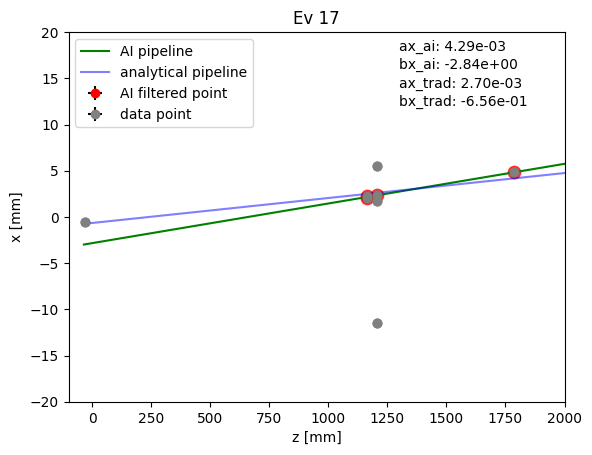

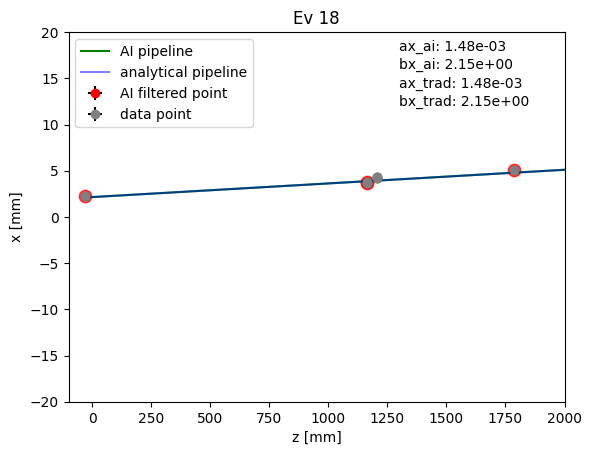

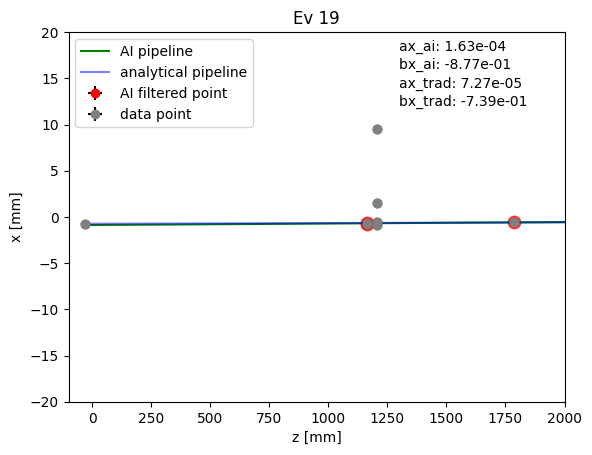

In [6]:
###plot comparison with exp data
start_Ev=10
stop_Ev=20

if view=='xz':

    chi2x_ev=[]
    for i in range(0,len(ax_ev)):
        chi2=0.0
        for j in range(0,len(x_hit[i])):
            chi2 += ROOT.TMath.Power((x_hit[i][j] - ax_ev[i] * z_hit[i][j]- bx_ev[i]) / dx_hit[i][j], 2)
            # print(dx_hit[i][j])
        # print(chi2)
        # chi2/=(len(det_ev)-2)   
        chi2x_ev.append(chi2)   
 

    z= np.linspace(-35, 2000, 4)  
    z_trad=np.linspace(-35, 2000, 4)  

    for i in range(start_Ev,stop_Ev): # 
        if i not in no_good_events:
            # if(chi2_ev[i]>10):
            plt.scatter(z_hit[i],x_hit[i],color='red',s=80,alpha=0.7) 
            plt.scatter(zx_orig[i],x_orig[i],color='grey',s=40) 
            plt.errorbar(z_hit[i], x_hit[i], xerr=0,yerr=dx_hit[i],fmt='o',ecolor='black',color='red',label='AI filtered point',)
            plt.errorbar(zx_orig[i], x_orig[i], xerr=0,yerr=dx_orig[i],marker='o',fmt='o',ecolor='black',color='grey',label='data point')
        
            plt.ylim(-20,20) 
            plt.xlim(-100,2000)
            x=ax_ev[i]*z+bx_ev[i] 
            x_trad=ax_ev_trad[i]*z_trad+bx_ev_trad[i] 
            plt.plot(z, x,label='AI pipeline',color='green',marker=None) 
            plt.plot(z_trad, x_trad, label='analytical pipeline',color='blue',marker=None,alpha=0.5) 
            plt.ylim(-20,20) 
            ax_rounded = '{:.2e}'.format(ax_ev[i])
            bx_rounded = '{:.2e}'.format(bx_ev[i])
            ax_rounded_trad = '{:.2e}'.format(ax_ev_trad[i])
            bx_rounded_trad = '{:.2e}'.format(bx_ev_trad[i])
            plt.ylabel('x [mm]') 
            plt.xlabel('z [mm]') 
            plt.text( 1300,18,f'ax_ai: {ax_rounded}', fontsize=10)
            plt.text(1300, 16, f'bx_ai: {bx_rounded}', fontsize=10) 
            plt.text( 1300,14,f'ax_trad: {ax_rounded_trad}', fontsize=10)
            plt.text(1300, 12, f'bx_trad: {bx_rounded_trad}', fontsize=10)         
            plt.legend(loc='upper left')
            # plt.xlim(-100,2000) 
            # plt.ylim(-20,20) 
            plt.title(f'Ev {i}') 
            # print(dx_hit[i]) 
            # print(x_hit[i]) 
             # Rimuovi la linea che unisce i punti
            
            plt.xlim(-100,2000) 
            plt.ylim(-20,20)           
            plt.savefig(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv/comparison_pipeline_ev_xz{i}.png')      
            plt.show()
else:
    chi2y_ev=[]
    for i in range(0,len(ay_ev)):
        chi2=0.0
        for j in range(0,len(y_hit[i])):
            chi2 += ROOT.TMath.Power((y_hit[i][j] - ay_ev[i] * z_hit[i][j]- by_ev[i]) / dy_hit[i][j], 2);
        # chi2/=(len(det_ev)-2)

        chi2y_ev.append(chi2)
 
    z= np.linspace(-35, 2000, 4)  
    z_trad=np.linspace(-35, 2000, 4)  
    for i in range(start_Ev,stop_Ev): # 
        # if(chi2_ev[i]>10):
        plt.scatter(z_hit[i],y_hit[i],color='red',s=80,alpha=0.7) 
        plt.scatter(zy_orig[i],y_orig[i],color='grey',s=40) 
        plt.errorbar(z_hit[i], y_hit[i], xerr=0,yerr=dy_hit[i],fmt='o',ecolor='black',color='red',label='AI filtered point',)
        plt.errorbar(zy_orig[i], y_orig[i], xerr=0,yerr=dy_orig[i],marker='o',fmt='o',ecolor='black',color='grey',label='data point')
    
        plt.ylim(-20,20) 
        plt.xlim(-100,2000)
        y=ay_ev[i]*z+by_ev[i] 
        y_trad=ay_ev_trad[i]*z_trad+by_ev_trad[i] 
        plt.plot(z, y,label='AI pipeline',color='green',marker=None) 
        plt.plot(z_trad, y_trad, label='analytical pipeline',color='blue',marker=None,alpha=0.5) 
        plt.ylim(-20,20) 
        ay_rounded = '{:.2e}'.format(ay_ev[i])
        by_rounded = '{:.2e}'.format(by_ev[i])
        ay_rounded_trad = '{:.2e}'.format(ay_ev_trad[i])
        by_rounded_trad = '{:.2e}'.format(by_ev_trad[i])
        plt.ylabel('y [mm]') 
        plt.xlabel('z [mm]') 
        plt.text( 1300,18,f'ay_ai: {ay_rounded}', fontsize=10)
        plt.text(1300, 16, f'by_ai: {by_rounded}', fontsize=10) 
        plt.text( 1300,14,f'ay_trad: {ay_rounded_trad}', fontsize=10)
        plt.text(1300, 12, f'by_trad: {by_rounded_trad}', fontsize=10)         
        plt.legend(loc='upper left')
        # plt.xlim(-100,2000) 
        # plt.ylim(-20,20) 
        plt.title(f'Ev {i}') 
        # print(dx_hit[i]) 
        # print(x_hit[i]) 
         # Rimuovi la linea che unisce i punti
        
        plt.xlim(-100,2000) 
        plt.ylim(-20,20)
        plt.savefig(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv/comparison_pipeline_ev_yz{i}.png')      
        plt.show()

Info in <TCanvas::Print>: png file /lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv/chi2x_exp.png has been created


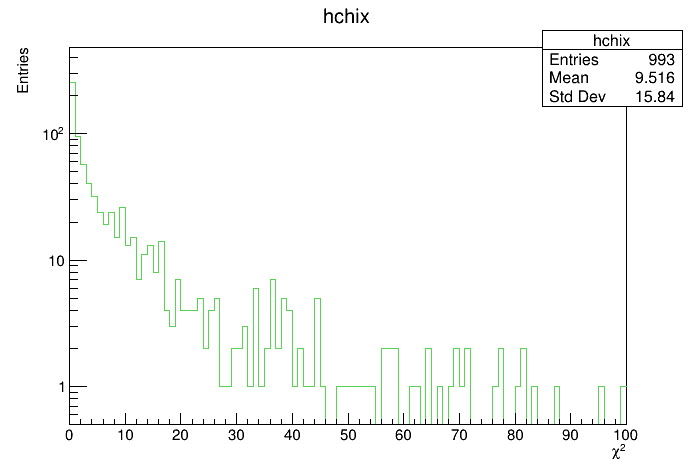

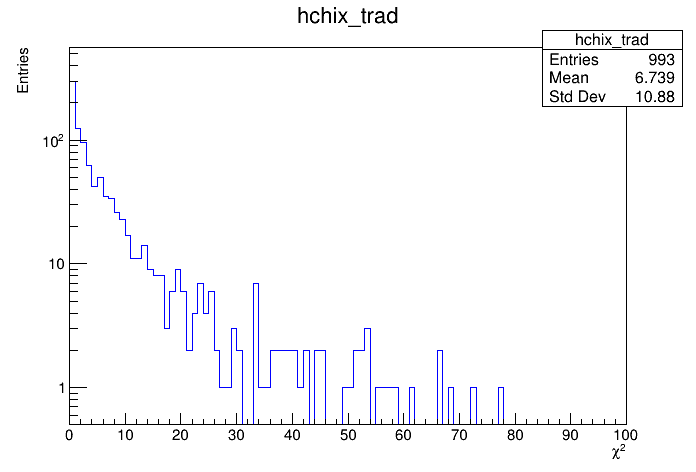

In [7]:
if view=="xz":
    hchix=ROOT.TH1F("hchix","hchix",100,0,100)
    hchix.GetYaxis().SetTitle("Entries")
    hchix.GetXaxis().SetTitle("#chi^{2}")
    hchix.SetLineColor(8)
    hchix.SetMarkerColor(8)
    hchix_trad=ROOT.TH1F("hchix_trad","hchix_trad",100,0,100)
    hchix_trad.GetYaxis().SetTitle("Entries")
    hchix_trad.GetXaxis().SetTitle("#chi^{2}")
    hchix_trad.SetLineColor(4)
    hchix_trad.SetMarkerColor(4)

    for i in range(0,len(chi_x_trad)):
        hchix_trad.Fill(chi_x_trad[i])
    for i in range(0,len(chi2x_ev)):
        hchix.Fill(chi2x_ev[i])
    
    cchi=ROOT.TCanvas("cchi","cchi")
    cchi.cd()
    cchi.SetLogy()
    hchix.Draw()
    cchi_trad=ROOT.TCanvas("cchi_trad","cchi_trad")
    cchi_trad.cd()
    cchi_trad.SetLogy()
    hchix_trad.Draw("")
    cchi.Draw()
    cchi_trad.Draw()
    dict_chix={'hchix':hchix,'hchix_trad':hchix_trad}
    root_function.draw_mult_stack(dict_chix,'#chi^{2} distribution in xz view',img_name='chi2x_exp',path='/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv')

    # cchi_trad.SaveAs(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/1million_sage_conv/chi2x_trad.png') 
    # cchi.SaveAs(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/1million_sage_conv/chi_x.png') 
    
else:
    hchiy=ROOT.TH1F("hchiy","hchiy",100,0,100)
    hchiy.GetYaxis().SetTitle("Entries")
    hchiy.GetXaxis().SetTitle("#chi^{2}")
    hchiy.SetMarkerColor(8)
    hchiy.SetLineColor(8)
    hchiy_trad=ROOT.TH1F("hchiy_trad","hchiy_trad",100,0,100)
    hchiy_trad.GetYaxis().SetTitle("Entries")
    hchiy_trad.GetXaxis().SetTitle("#chi^{2}")
    hchiy_trad.SetMarkerColor(4)
    hchiy_trad.SetLineColor(4)
    for i in range(0,len(chi_y_trad)):
        hchiy_trad.Fill(chi_y_trad[i])
    for i in range(0,len(chi2y_ev)):
        hchiy.Fill(chi2y_ev[i])
    
    cchiy=ROOT.TCanvas("cchiy","cchiy")
    cchiy.cd()
    cchiy.SetLogy()
    hchiy.Draw()
    cchiy_trad=ROOT.TCanvas("cchiy_trad","cchiy_trad")
    cchiy_trad.cd()
    cchiy_trad.SetLogy()

    hchiy_trad.Draw("")
    cchiy.Draw()
    cchiy_trad.Draw()
    dict_chiy={'hchiy':hchiy,'hchiy_trad':hchiy_trad}
    root_function.draw_mult_stack(dict_chiy,'#chi^{2} distribution in yz view',img_name='chi2y_exp',path='/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv')

    # cchiy_trad.SaveAs(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/1million_sage_conv/chi2y_trad.png') 
    # cchiy.SaveAs(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/1million_sage_conv/chi_y.png') 

Warning in <TFile::Append>: Replacing existing TH1: h_ax (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_ax_trad (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_ax
Info in <TCanvas::Print>: png file /lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv/ax_exp.png has been created
Warning in <TFile::Append>: Replacing existing TH1: h_bx (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: h_bx_trad (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_bx
Info in <TCanvas::Print>: png file /lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv/bx_exp.png has been created


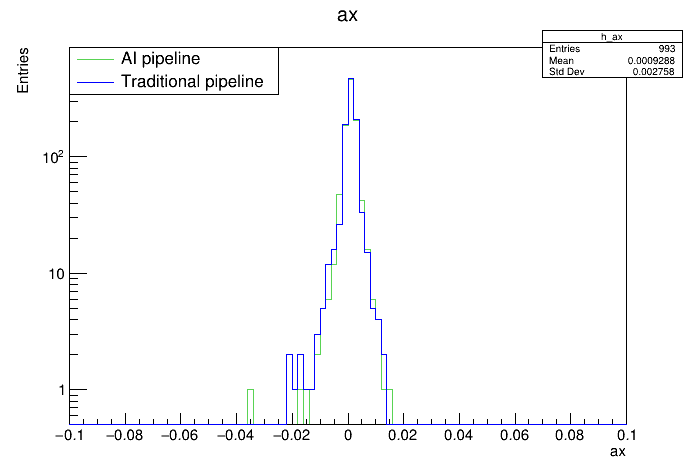

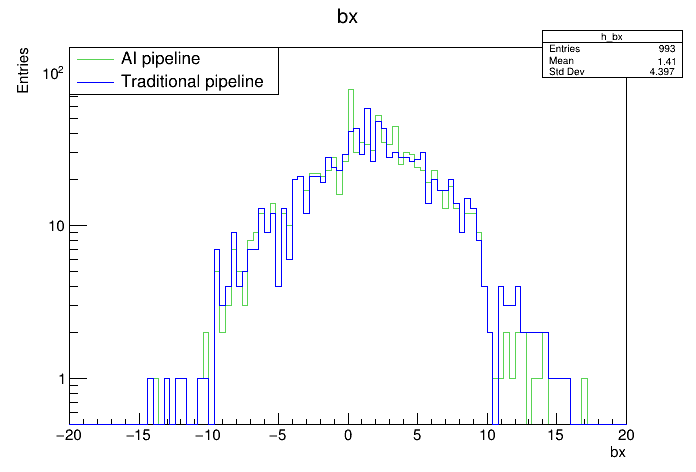

In [9]:
if view=='xz':
    h_ax=ROOT.TH1F("h_ax","ax",100,-0.1,0.1)
    h_ax_trad=ROOT.TH1F("h_ax_trad","h_ax_trad",100,-0.1,0.1)
    h_ax.GetXaxis().SetTitle('ax')
    h_ax.GetYaxis().SetTitle('Entries')
    for i in ax_ev:
        h_ax.Fill(i)
    for i in ax_ev_trad:
        h_ax_trad.Fill(i)
    c_ax=ROOT.TCanvas("c_ax","c_ax")  
    c_ax.SetLogy()
    c_ax.cd()
    h_ax.Draw()
    h_ax.SetLineColor(8)
    h_ax.SetMarkerColor(8)
    h_ax_trad.SetLineColor(4)
    h_ax_trad.SetMarkerColor(4)
    h_ax_trad.Draw("SAME")
    h_ax_trad.Draw("SAME")  
    legend = ROOT.TLegend(0.1, 0.9, 0.4, 0.8)
    legend.AddEntry(h_ax, "AI pipeline", "l")
    legend.AddEntry(h_ax_trad, "Traditional pipeline", "l")
    legend.Draw()
    c_ax.Draw()

    dict_ax={'h_ax':h_ax,'h_ax_trad':h_ax_trad}
    root_function.draw_mult_stack(dict_ax,'Angular coefficient distribution in xz view',img_name='ax_exp',path='/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv')


    h_bx=ROOT.TH1F("h_bx","bx",100,-20,20)
    h_bx_trad=ROOT.TH1F("h_bx_trad","h_bx_trad",100,-20,20)
    h_bx.GetXaxis().SetTitle('bx')
    h_bx.GetYaxis().SetTitle('Entries')
    h_bx.SetLineColor(8)
    h_bx.SetMarkerColor(8)
    for i in range(0,len(bx_ev)):
        h_bx.Fill(bx_ev[i])
    for j in range(len(bx_ev_trad)):
        h_bx_trad.Fill(bx_ev_trad[j])
    c_bx=ROOT.TCanvas("c_bx","c_bx")    
    c_bx.SetLogy()
    c_bx.cd()
    h_bx.Draw()
    h_bx_trad.SetLineColor(4)
    h_bx_trad.SetMarkerColor(4)
    h_bx_trad.Draw("SAME")
    legend1 = ROOT.TLegend(0.1, 0.9, 0.4, 0.8)
    legend1.AddEntry(h_bx, "AI pipeline", "l")
    legend1.AddEntry(h_bx_trad, "Traditional pipeline", "l")
    legend1.Draw()
    c_bx.Draw()
    dict_bx={'h_bx':h_bx,'h_bx_trad':h_bx_trad}
    root_function.draw_mult_stack(dict_bx,'Intercept distribution in xz view',img_name='bx_exp',path='/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv')

    # c_ax.SaveAs(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/1million_sage_conv/c_ax.png') 
    # c_bx.SaveAs(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/1million_sage_conv/c_bx.png') 

    
else:
    h_ay=ROOT.TH1F("h_ay","ay",100,-0.1,0.1)
    h_ay_trad=ROOT.TH1F("h_ay_trad","h_ay_trad",100,-0.1,0.1)
    h_ay.GetXaxis().SetTitle('ay')
    h_ay.GetYaxis().SetTitle('Entries')
    h_ay.SetLineColor(4)
    h_ay.SetMarkerColor(4)
    for i in ay_ev:
        h_ay.Fill(i)
    for i in ay_ev_trad:
        h_ay_trad.Fill(i)
    c_ay=ROOT.TCanvas("c_ay","c_ay")  
    c_ay.SetLogy()
    c_ay.cd()
    h_ay.Draw()
    h_ay_trad.SetLineColor(8)
    h_ay_trad.SetMarkerColor(8)
    h_ay_trad.Draw("SAME")
    h_ay_trad.Draw("SAME")  
    legend = ROOT.TLegend(0.1, 0.9, 0.4, 0.8)
    legend.AddEntry(h_ay, "AI pipeline", "l")
    legend.AddEntry(h_ay_trad, "Traditional pipeline", "l")
    legend.Draw()
    c_ay.Draw()
    dict_ay={'h_ay':h_ay,'h_ay_trad':h_ay_trad}
    root_function.draw_mult_stack(dict_ay,'Angular coefficient distribution in yz view',img_name='ay_exp',path='/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv')
       
    h_by=ROOT.TH1F("h_by","by",100,-20,20)
    h_by_trad=ROOT.TH1F("h_by_trad","h_by_trad",100,-20,20)
    h_by.GetXaxis().SetTitle('by')
    h_by.GetYaxis().SetTitle('Entries')
    h_by.SetLineColor(4)
    h_by.SetMarkerColor(4)

    for i in range(0,len(by_ev)):
        h_by.Fill(by_ev[i])
    for j in range(len(by_ev_trad)):
        h_by_trad.Fill(by_ev_trad[j])
    c_by=ROOT.TCanvas("c_by","c_by")    
    c_by.SetLogy()
    c_by.cd()
    h_by.Draw()
    h_by_trad.SetLineColor(8)
    h_by_trad.SetMarkerColor(8)
    legend1 = ROOT.TLegend(0.1, 0.9, 0.4, 0.8)
    legend1.AddEntry(h_by, "AI pipeline", "l")
    legend1.AddEntry(h_by_trad, "Traditional pipeline", "l")
    legend1.Draw()
    h_by_trad.Draw("SAME")
    c_by.Draw()
    dict_by={'h_by':h_by,'h_by_trad':h_by_trad}
    root_function.draw_mult_stack(dict_by,'Intercept distribution in yz view',img_name='by_exp',path='/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/exp_data/sageconv')

    # c_ay.SaveAs(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/1million_sage_conv/c_ay.png') 
    # c_by.SaveAs(f'/lustrehome/federicacuna/TB_Sept_2023_ml/output_gnn_img_fit/1million_sage_conv/c_by.png') 
    